In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#  open data file from OECD, Organisation for Economic Co-operation and Development
path_in = os.path.join("..", "data", "MaybeData", "International", "DP_LIVE_21032019024128590.csv")
oecd_data = pd.read_csv(path_in)
oecd_df = pd.DataFrame(oecd_data)
oecd_df.head()
# each country may have multiple years, 1 line/year
# no breakout just total suicides per capita age-adjusted (good basis of comparison)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2014,12.3,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2015,12.8,NaN
2,AUT,SUICIDE,TOT,100000PER,A,2014,13.9,NaN
3,AUT,SUICIDE,TOT,100000PER,A,2015,12.9,NaN
4,AUT,SUICIDE,TOT,100000PER,A,2016,12.2,NaN


In [32]:
# len(oecd_df.groupby(["LOCATION"]).groups)     # 38 countries, 
# oecd_df.groupby('LOCATION').first()          # all have values for 2014
# oecd_df.groupby('LOCATION').last()          # some ONLY have data for 2014
# No population data or economica data, but a good overview comparing 2nd-1st world.
### Groupby to gather only 2014 data, since it is the only complete year. 
### Then sort by lowest to hightest suic rate. Set new index once sorted.
oecd_group = pd.DataFrame(oecd_df.groupby('LOCATION').first())
oecd_group = oecd_group.sort_values('Value')
oecd_group = oecd_group.reset_index()
oecd_group.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ZAF,SUICIDE,TOT,100000PER,A,2014,1.2,NaN
1,TUR,SUICIDE,TOT,100000PER,A,2014,2.3,NaN
2,GRC,SUICIDE,TOT,100000PER,A,2014,4.7,NaN
3,COL,SUICIDE,TOT,100000PER,A,2014,4.9,NaN
4,MEX,SUICIDE,TOT,100000PER,A,2014,5.5,NaN


In [33]:
# The country codes are difficult to understand. And don't match the OECD members.
country_members = ["Australia","Austria""Belgium","Canada","Chile","Czech Republic",\
                   "Denmark","Estonia","Finland","France","Germany","Greece","Hungary",\
                   "Iceland","Ireland","Israël","Italy","Japan","Korea","Latvia","Lithuania"\
                   "Luxembourg","Mexico","Netherlands","New Zealand","Norway","Poland",\
                   "Portugal","Slovak Republic","Slovenia","Spain","Switzerland",
                   "Turkey","United Kingdom","United States"]
# len(country_members)                        # 36 countries... ZAF and which other are extra? 
# len(oecd_group.loc[:,"LOCATION"])         # 38 countries
print(*oecd_group.loc[:,"LOCATION"])
print(*country_members)
###  oecd_df is missing "Canada", "Latvia", "New Zealand", "United States"
###  oecd_df extras incl. "BRA", "COL", "CRI", "LVA", "ZAF"

ZAF TUR GRC COL MEX ISR BRA CRI ITA GBR ESP SVK PRT CHL NLD NOR IRL DNK DEU SWE LUX CHE AUS FRA CZE USA ISL AUT FIN POL BEL SVN EST JPN HUN LVA KOR LTU
Australia AustriaBelgium Canada Chile Czech Republic Denmark Estonia Finland France Germany Greece Hungary Iceland Ireland Israël Italy Japan Korea Latvia LithuaniaLuxembourg Mexico Netherlands New Zealand Norway Poland Portugal Slovak Republic Slovenia Spain Switzerland Turkey United Kingdom United States


In [44]:
# Convert 3-letter country codes > European names, the hard way.
countries = {"AUS":"Australia", "AUT":"Austria", "BEL":"Belgium", \
             "BRA":"Brazil", "CHE":"Switzerland", "CHL":"Chile", 
             "COL":"Columbia", "CRI":"Costa Rica", "CZE":"Czech Republic",\
             "DEU":"Germany", "DNK":"Denmark", "ESP":"Spain", \
             "EST":"Estonia", "FIN":"Finland", "FRA":"France", \
             "GBR":"United Kingdom", "GRC":"Greece", "HUN":"Hungary", \
             "IRL":"Ireland", "ISL":"Iceland", "ISR":"Israël", \
             "ITA":"Italy", "JPN":"Japan", "KOR":"Korea", \
             "LTU":"Lithuania", "LUX":"Luxembourg", "MEX":"Mexico", \
             "NLD":"Netherlands", "NOR":"Norway", "POL":"Poland", \
             "PRT":"Portugal", "SLV":"Slovak Republic", "SVN":"Slovenia", \
             "SWE":"Sweden", "TUR":"Turkey", "ZAF":"South Africa"}
oecd_group.replace(to_replace=countries, value=None, inplace=True)
oecd_countries = pd.DataFrame(oecd_group)
oecd_countries


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,South Africa,SUICIDE,TOT,100000PER,A,2014,1.2,NaN
1,Turkey,SUICIDE,TOT,100000PER,A,2014,2.3,NaN
2,Greece,SUICIDE,TOT,100000PER,A,2014,4.7,NaN
3,Columbia,SUICIDE,TOT,100000PER,A,2014,4.9,NaN
4,Mexico,SUICIDE,TOT,100000PER,A,2014,5.5,NaN
5,Israël,SUICIDE,TOT,100000PER,A,2014,5.5,NaN
6,Brazil,SUICIDE,TOT,100000PER,A,2014,5.7,NaN
7,Costa Rica,SUICIDE,TOT,100000PER,A,2014,5.7,NaN
8,Italy,SUICIDE,TOT,100000PER,A,2014,6.0,NaN
9,United Kingdom,SUICIDE,TOT,100000PER,A,2014,7.4,NaN


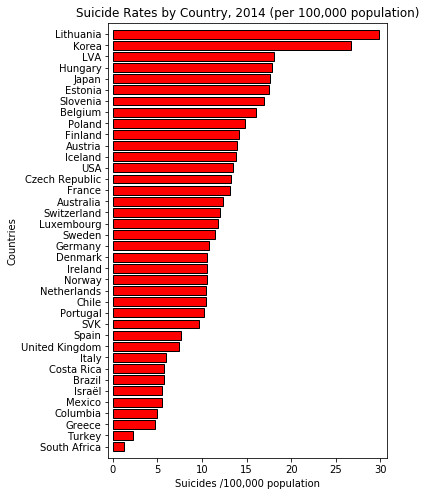

In [43]:
y_axis = np.arange(len(oecd_countries))
plt.figure(figsize=(5,8))
plt.barh(y_axis, oecd_countries["Value"], color='r', align="center", \
         edgecolor='k', linewidth=1)
plt.xlim(-0.5, (oecd_countries["Value"]).max()+1)
plt.ylim(-1, len(oecd_countries))
labels = oecd_countries.loc[:,"LOCATION"]
plt.yticks(y_axis, labels) 
plt.title("Suicide Rates by Country, 2014 (per 100,000 population)")
plt.xlabel("Suicides /100,000 population")
plt.ylabel("Countries")

# plt.savefig("../Images/internat_suic_sorted.png")
path_out_internat = os.path.join("..", "Images", "internat_suic_sorted.png")
plt.savefig(path_out_internat)
plt.show()